# <a id='link2'>Credit Card Users Churn Prediction</a>
# <a id='link2'>Background & Context:</a>
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

# <a id='link2'>Objective:</a>     
1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques to identify the best possible model that will give the required performance
4. Generate a set of insights and recommendations that will help the bank

# <a id='link2'>Data Dictionary:</a>
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# <a id='link2'>Loading Libraries</a>

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to tune model, get different metric scores, oversample and undersample data
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# <a id='link2'>Loading and exploring the data</a>

In [2]:
data = pd.read_csv("BankChurners.csv")
df = data.copy() # Making a copy of the data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# Setting the random seed to look at 10 random rows
np.random.seed(1)
df.sample(n=10)

There are 10127 rows and 21 columns.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.0,2488,32028.0,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.0,0,1625.0,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.0,1276,4259.0,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.0,1170,24654.0,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.0,1477,493.0,0.662,2493,44,0.571,0.750


* The dataset has 10127 rows and 21 columns.

In [3]:
df.info() # Checking the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
## Converting the data type of categorical features to 'category'
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level','Marital_Status', 'Income_Category', 'Card_Category']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

### Checking for missing values

In [5]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

* There are missing values in the data. Education_Level and Marital_Status columns both have 15% and 7.4% missing values, respectively.
* Missing values will be imputed using KNNImputer after splitting the data into train, test and validation to avoid leakage.

In [6]:
# CLIENTNUM is unique for each customer and might not add value to modeling, so we will drop it.
df.drop(['CLIENTNUM'],axis=1,inplace=True)

### Statistical summary for the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [8]:
df.describe(include=['category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [9]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('-'*35)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-----------------------------------
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
-----------------------------------
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-----------------------------------
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
-----------------------------------
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
-----------------------------------
Unique values in Card_Category are :
Blue        9436
Silver       555
Gol

### Insights:

- We dropped 'CLIENTNUM' column because it's an ID variable which is unique to each customer and might not add value to the model, We can neglect this information for our model prediction.
- Income category column has a unique value 'abc' which doesn't relate to the column description. It will be treated as missing values and imputed after the data split.
- Most of the customers earn less than 40k dollars and less than 10% earn above 120k dollars.
- The average utilization ratio of the customers is aprroximately 0.27
- There's a noticeable difference in the 75th percentile and maximum value of most of the numerical value columns, indicating that there might be outliers present.
- More than 90% of the customers uses the blue card.
- Customer age ranges from 26 to 73 with an average of 46.
- Some of the customers have credit limit as high as 34,516. Also, there is a noticeable high correlation between credit limit and Avg open to buy, we will see if some insights can be extracted from heatmap.

## Data Pre-Processing

In [10]:
df['Income_Category'] = df['Income_Category'].replace(['abc'], np.nan) # Treating Unique value 'abc' as missing value

* Missing values will be imputed using KNNImputer after splitting the data into train, test and validation to avoid leakage.

# <a id='link2'>Exploratory Data Analysis</a>

## Univariate analysis

In [11]:
# Writing a function to help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = figsize, 
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

### Customer_Age

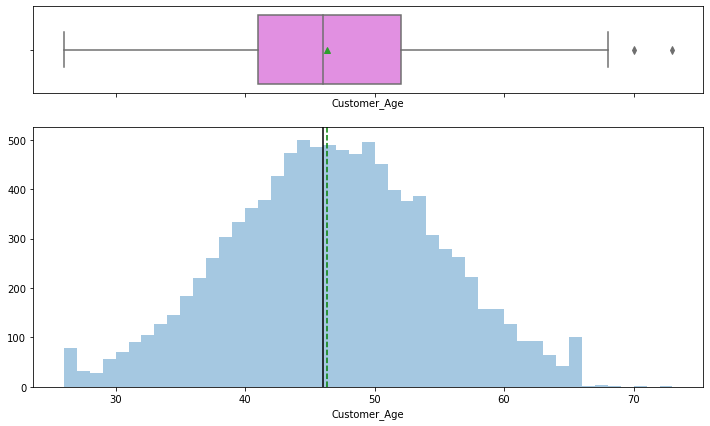

In [12]:
histogram_boxplot(df["Customer_Age"])

- Customer_Age is somewhat normally distributed
- The mean and median are relatively close
- The boxplot shows that there are outliers at the right end

### Months_on_book

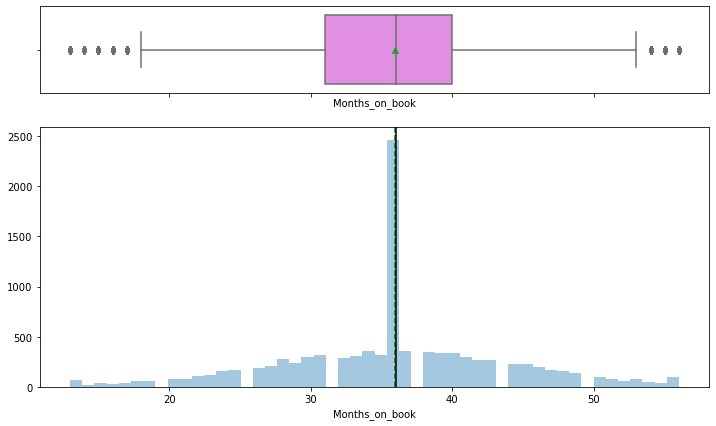

In [13]:
histogram_boxplot(df["Months_on_book"])

- This variable has outliers on both sides
- Majority of the customers relationship with the bank is 35 months

### Credit_Limit

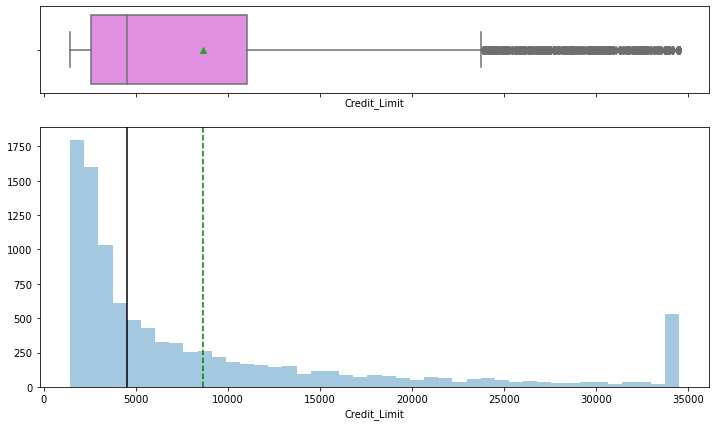

In [14]:
histogram_boxplot(df["Credit_Limit"])

- The distribution for the customers credit limit is right-skewed 
- There are some outliers present. We will not remove all such data points as they represent real market trends
- Some of the customers have credit limit as high as 34000, but majority of the customers credit limit is lower than 5000 

### Total_Revolving_Bal

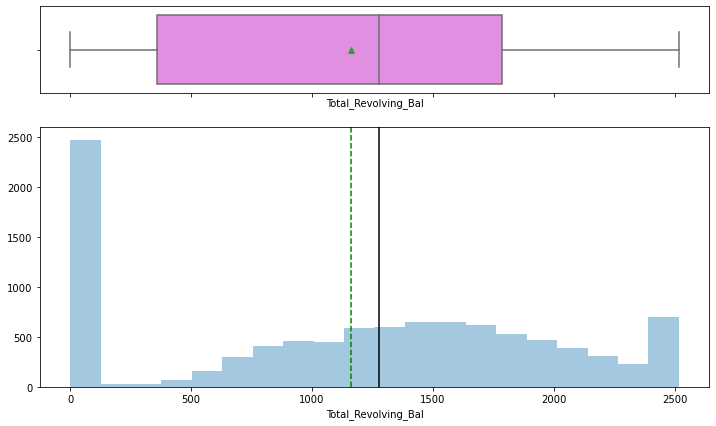

In [15]:
histogram_boxplot(df["Total_Revolving_Bal"])

- Most of the customers have a revolving balance of zero, which means they don't carry over any balance from the previous month balance
- There are no outliers present.

### Avg_Open_To_Buy

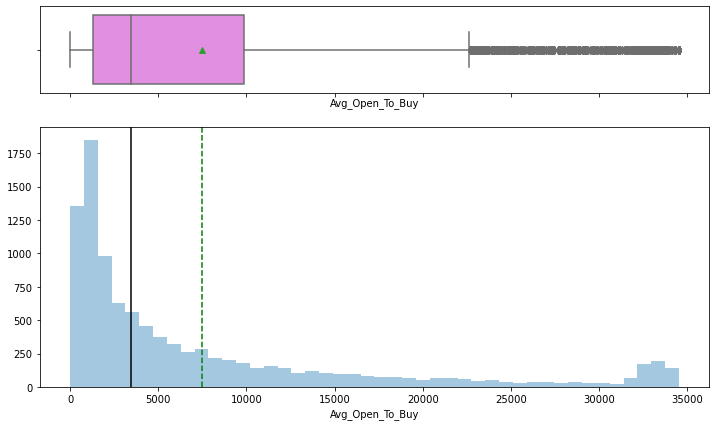

In [16]:
histogram_boxplot(df["Avg_Open_To_Buy"])

- The distribution for the customers Avg_Open_To_Buy is right-skewed and its similar to Credit_Limit distribution, meaning there is a possible high correlation between the two variables.
- There are some outliers present. We will not remove all such data points as they represent real market trends

### Total_Amt_Chng_Q4_Q1

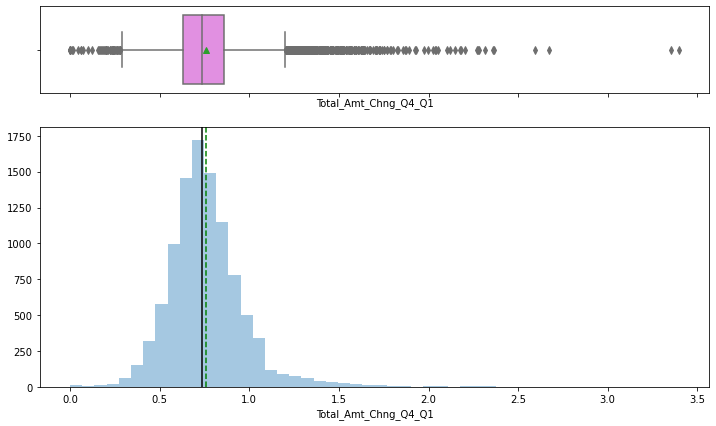

In [17]:
histogram_boxplot(df["Total_Amt_Chng_Q4_Q1"])

- The distribution is right-skewed
- The boxplot shows that there are outliers on both ends
- We will not treat these outliers as they represent the real market trend

### Total_Trans_Amt

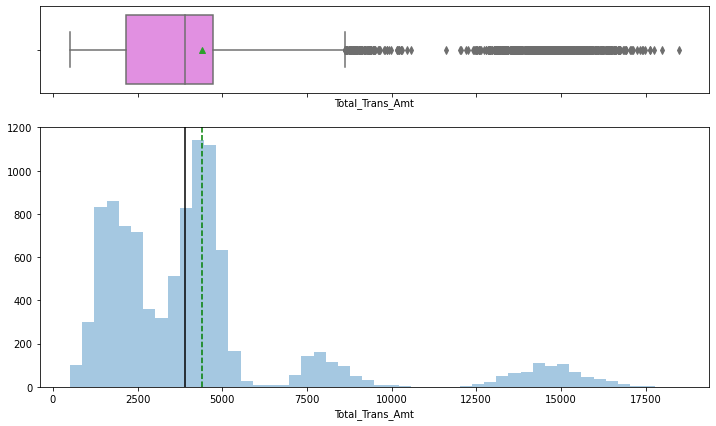

In [18]:
histogram_boxplot(df["Total_Trans_Amt"])

* Distribution of Total Transaction Amount is right-skewed with many outliers towards the right end
* From the boxplot, we can see that customers with more than 8500 total transaction amount are outliers

### Total_Trans_Ct

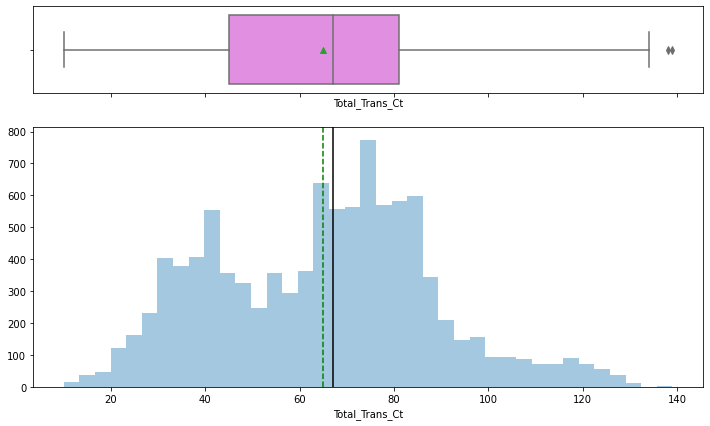

In [19]:
histogram_boxplot(df["Total_Trans_Ct"])

- The mean and median are relatively close
- The distribution is somewhat normally distributed
- The boxplot shows that there are outliers at the right end

### Total_Ct_Chng_Q4_Q1

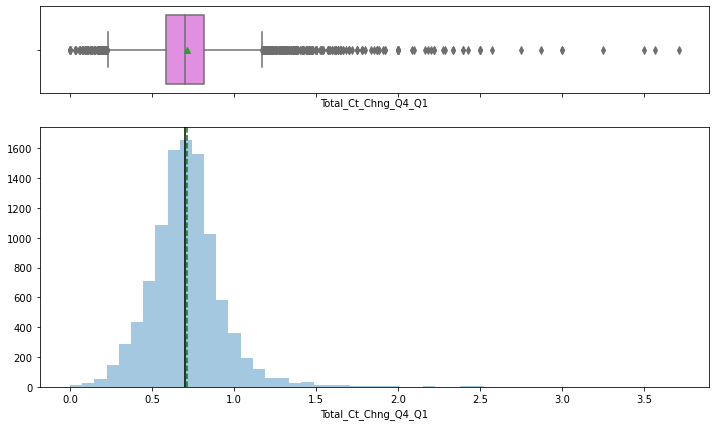

In [20]:
histogram_boxplot(df["Total_Ct_Chng_Q4_Q1"])

- The distribution is somewhat normally distributed
- There are outliers present on both end, with majority of the outliers towards the right end

### Avg_Utilization_Ratio

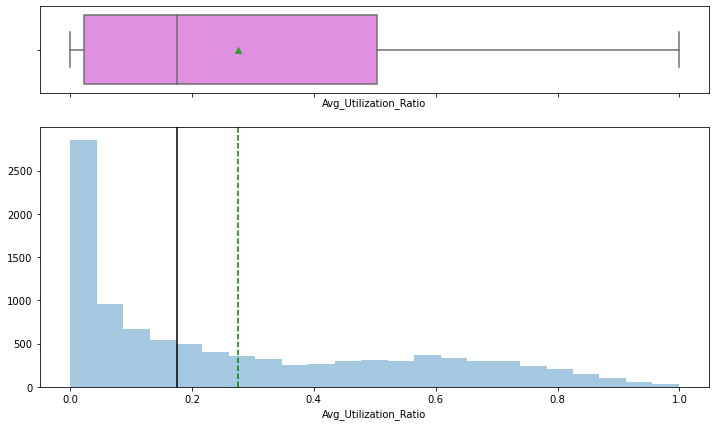

In [21]:
histogram_boxplot(df["Avg_Utilization_Ratio"])

- The distribution is right skewed with no outliers present
- Majority of the customers have a low average utilization ratio

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(feature):
    
    total = len(df[feature]) # length of the column
    plt.figure(figsize=(10,5))
    ax = sns.countplot(df[feature],palette='pastel')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

### Attrition_Flag

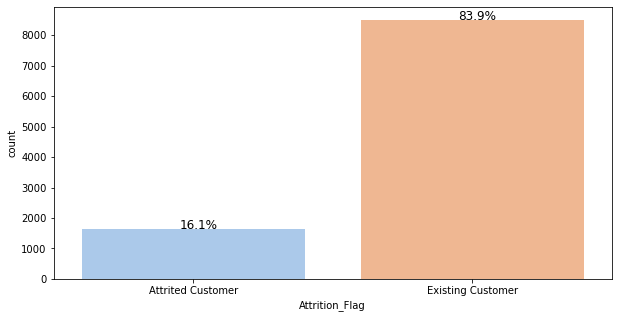

In [23]:
perc_on_bar('Attrition_Flag')

- Majority of the account holders are existing customers while, less than 20% of the accounts are closed

### Gender

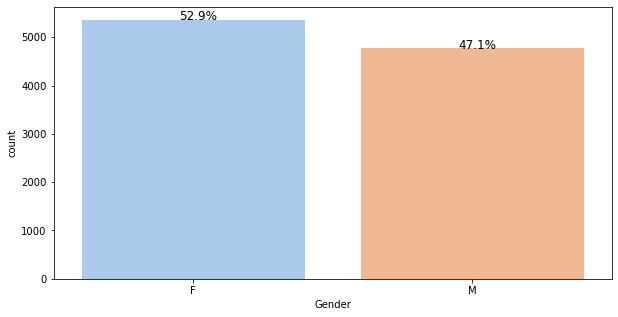

In [24]:
perc_on_bar('Gender')

- There are more female account holders compared to the male customers with a difference of less than 6%

### Dependent_count

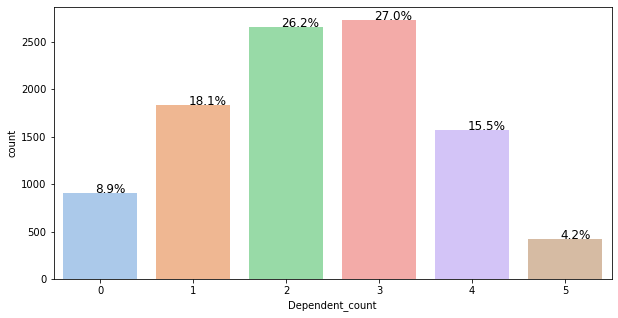

In [25]:
perc_on_bar('Dependent_count')

- There are more account holders with 2 and 3 dependents compared to the others. 
- Less than 20% of the account holders have dependents greater than 3, and less than 10% have no dependents

### Education_Level

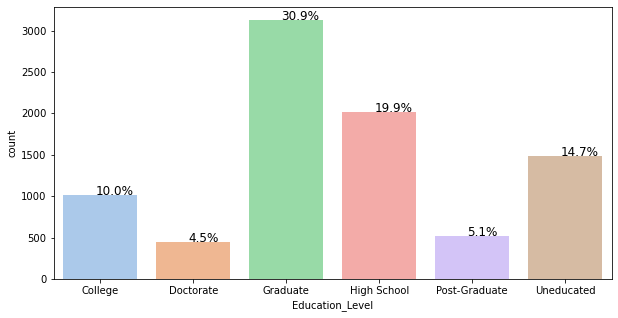

In [26]:
perc_on_bar('Education_Level')

- More than 85% of the customers are educated
- Majority of the account holder have a graduate educational qualification and less than 5% hold a doctorate

### Marital_Status

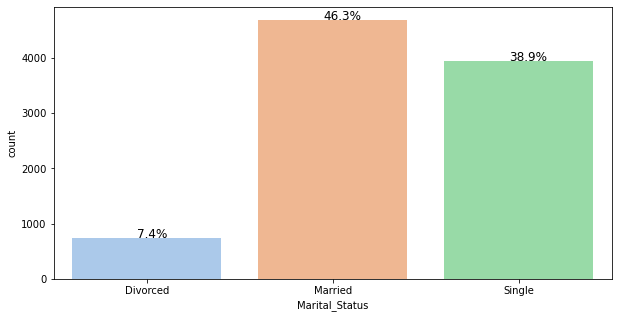

In [27]:
perc_on_bar('Marital_Status')

- Approximately 47% of the account holders are married and about 39% are single
- Less than 10% account holders are divorced

### Income_Category

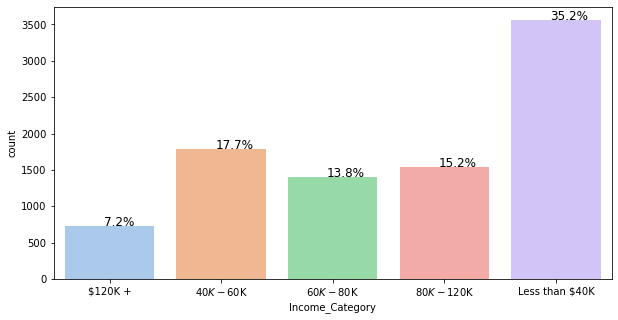

In [28]:
perc_on_bar('Income_Category')

- Most of the customers earn less than 40k dollars and less than 10% earn above 120k dollars.

### Card_Category

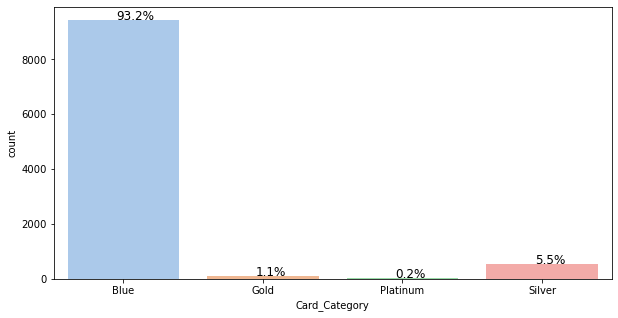

In [29]:
perc_on_bar('Card_Category')

- More than 90% of the account holders have a blue card, while less than 2% have either a gold or a platinum card

### Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon

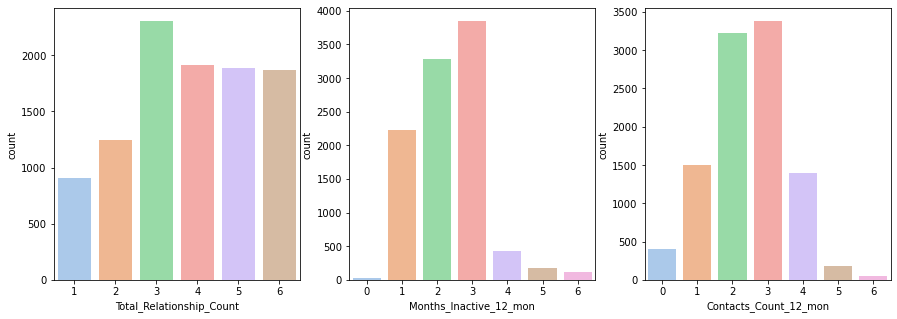

In [30]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.countplot(df['Total_Relationship_Count'], ax=ax[0], palette='pastel')
sns.countplot(df['Months_Inactive_12_mon'], ax=ax[1], palette='pastel')
sns.countplot(df['Contacts_Count_12_mon'], ax=ax[2], palette='pastel')
fig.show()

- Majority of the account holders hold 3 products while the percentage of account holders that holds 4, 5 or 6 products are relatively close
- Less than 10% account holders are inactive for more than 4 months, the most common inactive period ranges between 1 to 3 months
- Most of the account holders contact the bank between the range of 1 to 4 in a 12 month period

## Bivariate analysis

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

le.transform(['Attrited Customer', 'Existing Customer'])

In [31]:
# Function to plot stacked bar chart

def stacked_barplot(df, predictor, Attrition_Flag):
    """
    Print the category counts and plot a stacked bar chart

    df: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[Attrition_Flag].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[Attrition_Flag], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 80)
    tab = pd.crosstab(df[predictor], df[Attrition_Flag], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Attrition_Flag vs. Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
--------------------------------------------------------------------------------


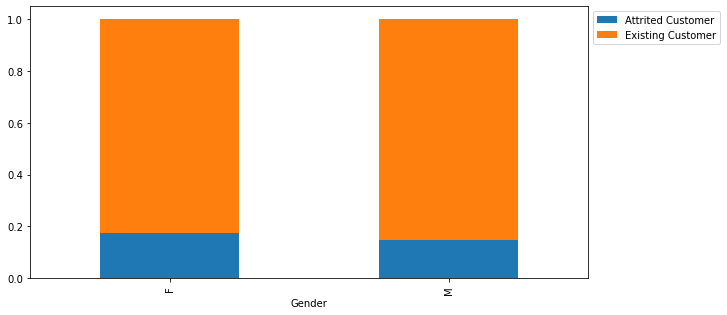

In [32]:
stacked_barplot(df, 'Gender', 'Attrition_Flag')

- Less than 20% account holders on both gender closed their account; more female account holders closed their account compared to male customers

### Attrition_Flag vs. Education_Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
--------------------------------------------------------------------------------


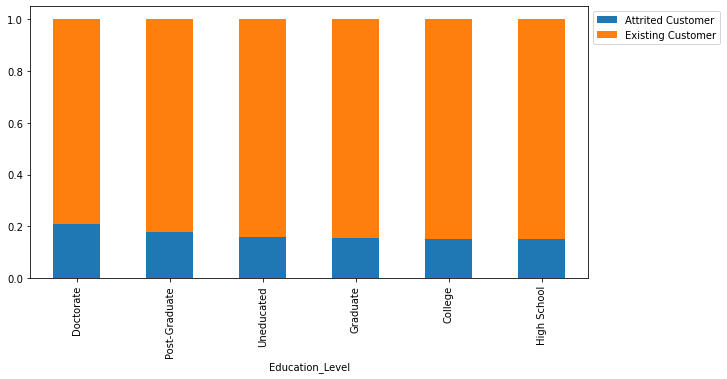

In [33]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

- The more educated an account holder, the more likely they will close their account because customers with a doctorate degree have the higher percentage of attrited customer

### Attrition_Flag vs. Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
--------------------------------------------------------------------------------


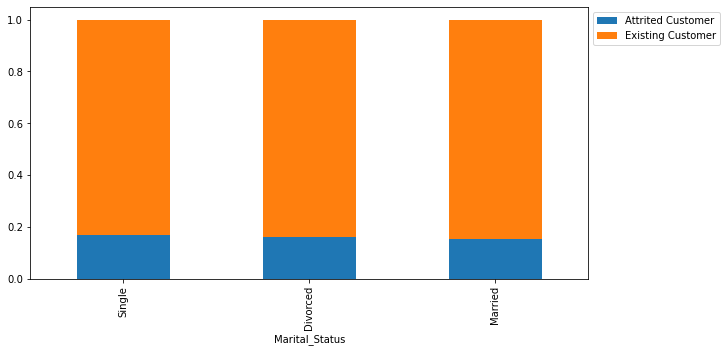

In [34]:
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag')

- Attrited customers proportion for all marital status are relatively equal

### Attrition_Flag vs. Income_Category

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
--------------------------------------------------------------------------------


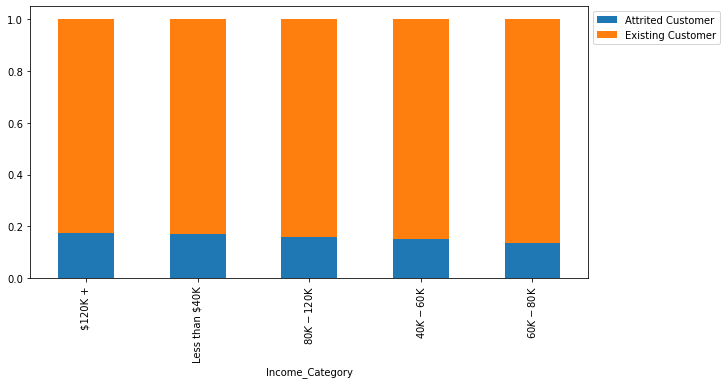

In [35]:
stacked_barplot(df, 'Income_Category', 'Attrition_Flag')

- Customers with income category higher than 120k are more likely to close their account, other than that, attrited customers proportion for all other income category are relatively equal

### Attrition_Flag vs. Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
--------------------------------------------------------------------------------


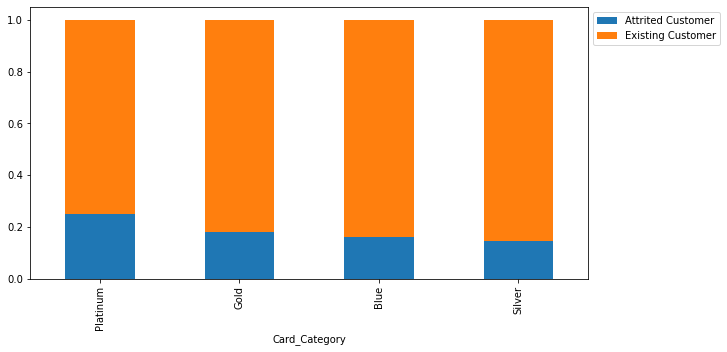

In [36]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag')

- Account holders with blue and silver card are less likely to get attrited compared to the other card categories. Platinum card holders are more likely to close their account.

In [37]:
# Function to plot Boxplots of customers
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].set_title(f'Boxplot of {x} w.r.t Attrition_Flag',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[0],palette='pastel',showmeans=True)
    axs[1].set_title(f'Boxplot of {x} w.r.t Attrition_Flag - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[1],showfliers=False,palette='pastel',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Attrition_Flag vs. Customer_Age

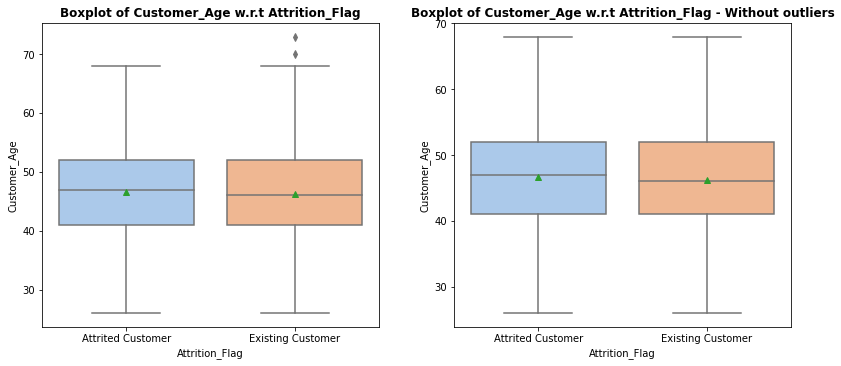

In [38]:
plot('Customer_Age')

- Customer's age don't seem to have any impact on the Attrition_Flag variable.

### Attrition_Flag vs. Months_on_book

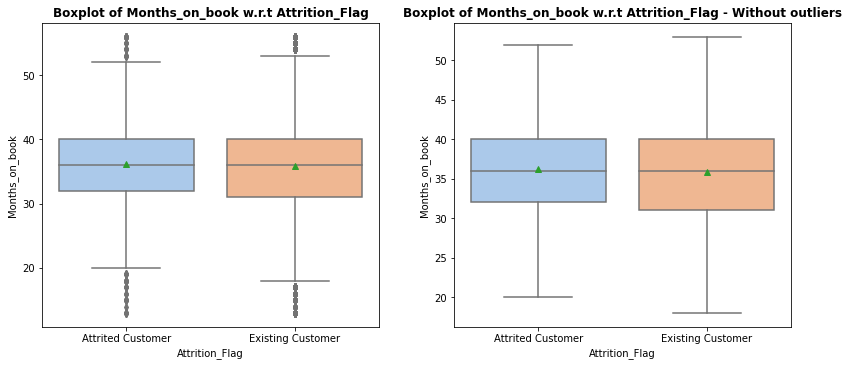

In [39]:
plot('Months_on_book')

- Attrition_Flag does not depend much on Months_on_book.

### Attrition_Flag vs. Credit_Limit

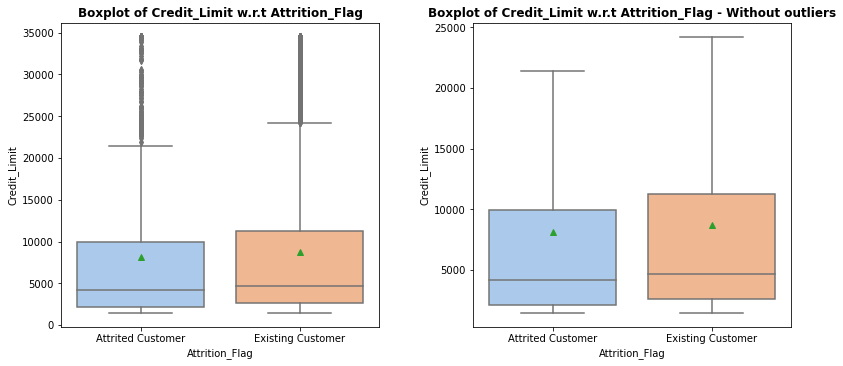

In [40]:
plot('Credit_Limit')

- We can see that the third quartile amount of existing customer is much more than the third quartile amount of attrited customer.
- This shows that customers with less credit limit amounts are more likely to close their account.
- There are outliers in boxplots of both class distributions

### Attrition_Flag vs. Avg_Open_To_Buy

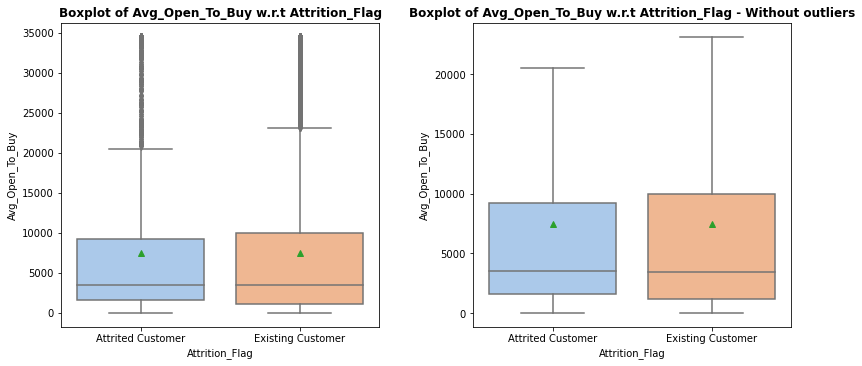

In [41]:
plot('Avg_Open_To_Buy')

- This plot is similar to the credit limit comparison plot, we will check further, seem there is a high correlation between both variables.

### Attrition_Flag vs. Avg_Utilization_Ratio

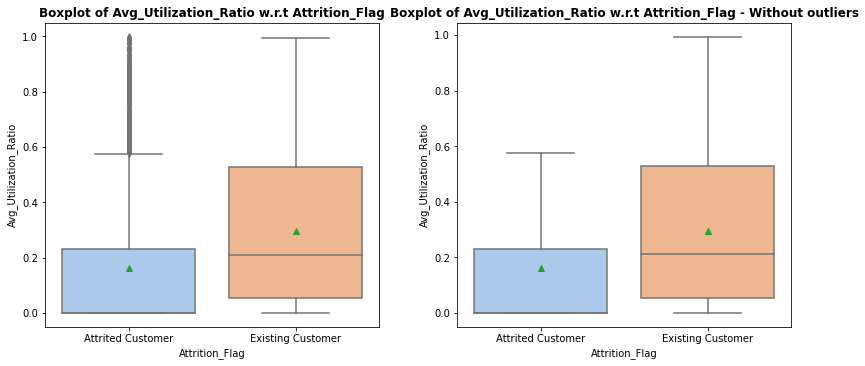

In [42]:
plot('Avg_Utilization_Ratio')

- Customers who have Avg_Utilization_Ratio less than 0.2 are more likely to get attrited.

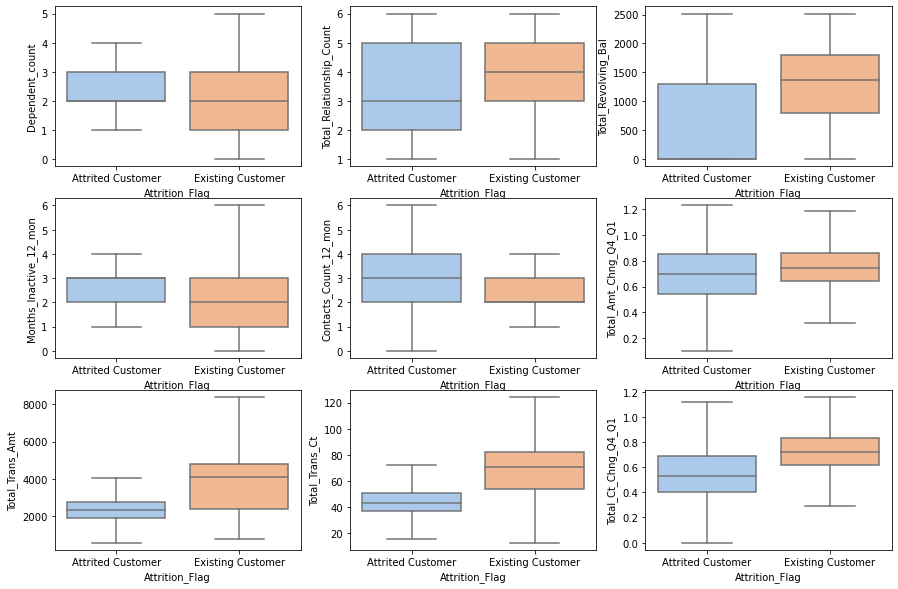

In [43]:
fig, ax =plt.subplots(3,3, figsize=(15, 10))
sns.boxplot(df['Attrition_Flag'], df['Dependent_count'], ax=ax[0,0], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Relationship_Count'], ax=ax[0,1], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Revolving_Bal'], ax=ax[0,2], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Months_Inactive_12_mon'], ax=ax[1,0], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Contacts_Count_12_mon'], ax=ax[1,1], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Amt_Chng_Q4_Q1'], ax=ax[1,2], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Trans_Amt'], ax=ax[2,0], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Trans_Ct'], ax=ax[2,1], palette='pastel', showfliers=False)
sns.boxplot(df['Attrition_Flag'], df['Total_Ct_Chng_Q4_Q1'], ax=ax[2,2], palette='pastel', showfliers=False)
fig.show()

- Customers who make more than 3 contacts with the bank within a 12 month period and holds less than 3 products are more likely to get attrited
- Customers with a total revolving balance more than 1250 are more likely to retain their account
- Account holders with more than 50 total transaction count and more than 3000 total transaction amount are more likely to remain existing customers
- Customers with less than 2 inactive months during a 12 month period are less likely to close their account.

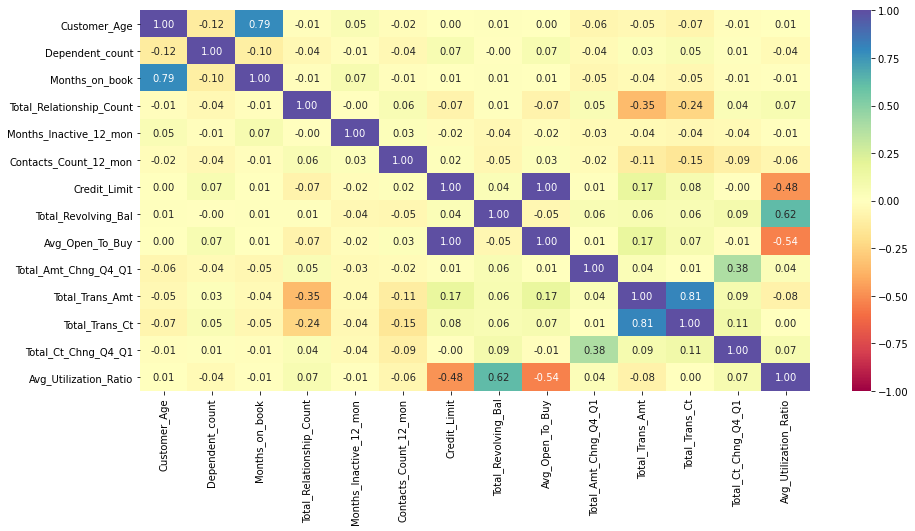

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- As expected, Credit_Limit and Avg_Open_to_Buy are perfectly correlated. We can drop one of them to avoid running into multicollinearity conundrum.
- Total_Trans_Ct and Total_Trans_Amt also have a high positive correlation. We can also drop on of this variable and drop the 4th and 1st quarter ratio column of whichever of the variable we drop.
- Customer age and months on book are also highly correlated, we will keep this two variable as they denote totally different description. Months of book is denoting the relationship period of the customer with the bank which will be important in modeling.
- Average utilization ratio is moderately correlated to Total revolving bal and Avg_Open_to_Buy, which is also expected.
- Other variables have no significant correlation between them

In [45]:
# Removing one out of two independent variables that are highly correlated

df.drop(['Avg_Open_To_Buy','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'], axis=1, inplace=True)

### Percentage of outliers, in each column of the data, using IQR.

In [46]:
Q1 = df.quantile(0.25) #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1            #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR         #Finding lower and upper bounds for all values. All values outside these bounds are outliers.
upper=Q3+1.5*IQR

In [47]:
((df.select_dtypes(include=['float64','int64'])<lower) | 
 (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Total_Amt_Chng_Q4_Q1        3.900464
Total_Trans_Amt             8.847635
Avg_Utilization_Ratio       0.000000
dtype: float64

* After identifying outliers, here we are not going to treat them as there will be outliers in a real case scenario with the variables with outliers, and we would want our model to learn the underlying pattern for such account holders.

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.

In [48]:
df.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Income_Category             1112
Marital_Status               749
Avg_Utilization_Ratio          0
Card_Category                  0
Customer_Age                   0
Gender                         0
Dependent_count                0
Months_on_book                 0
Total_Trans_Amt                0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Attrition_Flag                 0
dtype: int64

In [49]:
imputer = KNNImputer(n_neighbors=5)

In [50]:
# defining a list with names of columns that will be used for imputation
col_for_impute = [
    "Education_Level",
    "Income_Category",
    "Marital_Status",
]

In [51]:
df[col_for_impute].head(2)

,Education_Level,Income_Category,Marital_Status
0,High School,$60K - $80K,Married
1,Graduate,Less than $40K,Single


In [52]:
data1 = df.copy()

In [53]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Education_Level = {
    "Graduate": 0,
    "High School": 1,
    "Uneducated": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$80K - $120K": 2,
    "$60K - $80K": 3,
    "$120K +": 4,
}
data1["Income_Category"] = data1["Income_Category"].map(Income_Category)

Marital_Status = {
    "Married": 0, 
    "Single": 1, 
    "Divorced": 2
}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

In [54]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,1,0,3,Blue,39,5,1,3,12691.0,777,1.335,1144,0.061
1,Existing Customer,49,F,5,0,1,0,Blue,44,6,1,2,8256.0,864,1.541,1291,0.105
2,Existing Customer,51,M,3,0,0,2,Blue,36,4,1,0,3418.0,0,2.594,1887,0.000
3,Existing Customer,40,F,4,1,NaN,0,Blue,34,3,4,1,3313.0,2517,1.405,1171,0.760
4,Existing Customer,40,M,3,2,0,3,Blue,21,5,1,0,4716.0,0,2.175,816,0.000


* Values have been encoded.

# <a id='link3'>Data Preparation for Modeling</a>

### Checking for any duplicate row

In [55]:
data1.drop_duplicates(inplace=True)
data1.shape

(10127, 17)

* There are no duplicate rows in the dataset

In [56]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

### Split data into training, validation and test sets

In [57]:
# first we split data into temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 16) (2026, 16) (2026, 16)


### Imputing missing values

In [58]:
# Fit and transform the train data
X_train[col_for_impute] = imputer.fit_transform(X_train[col_for_impute])

# Transform the train data
X_val[col_for_impute] = imputer.fit_transform(X_val[col_for_impute])

# Transform the test data
X_test[col_for_impute] = imputer.transform(X_test[col_for_impute])

In [59]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Avg_Utilization_Ratio     

* All missing values have been treated.
* Let's inverse map the encoded values.

In [60]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [61]:
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Income_Category, "Income_Category")
inverse_mapping(Marital_Status, "Marital_Status")

* Checking inverse mapped values/categories.

In [62]:
cols = X_train.select_dtypes(include=["category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3205
M    2870
Name: Gender, dtype: int64
******************************
Graduate         1866
High School      1212
Uneducated        928
College           598
Post-Graduate     299
Doctorate         275
Name: Education_Level, dtype: int64
******************************
Married     2848
Single      2346
Divorced     449
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
$120K +            436
Name: Income_Category, dtype: int64
******************************
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: Card_Category, dtype: int64
******************************


In [63]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1106
M     920
Name: Gender, dtype: int64
******************************
Graduate         627
High School      399
Uneducated       278
College          217
Post-Graduate    108
Doctorate         89
Name: Education_Level, dtype: int64
******************************
Married     889
Single      814
Divorced    155
Name: Marital_Status, dtype: int64
******************************
Less than $40K    712
$40K - $60K       340
$80K - $120K      306
$60K - $80K       280
$120K +           140
Name: Income_Category, dtype: int64
******************************
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: Card_Category, dtype: int64
******************************


In [64]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1047
M     979
Name: Gender, dtype: int64
******************************
Graduate         635
High School      402
Uneducated       281
College          198
Post-Graduate    109
Doctorate         87
Name: Education_Level, dtype: int64
******************************
Married     950
Single      783
Divorced    144
Name: Marital_Status, dtype: int64
******************************
Less than $40K    719
$40K - $60K       374
$80K - $120K      311
$60K - $80K       275
$120K +           151
Name: Income_Category, dtype: int64
******************************
Blue        1875
Silver       120
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


### Creating Dummy Variables

In [65]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 26) (2026, 26) (2026, 26)


In [66]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio
0,45,M,3,1,0,3,Blue,39,5,1,3,12691.0,777,1.335,1144,0.061
1,49,F,5,0,1,0,Blue,44,6,1,2,8256.0,864,1.541,1291,0.105
2,51,M,3,0,0,2,Blue,36,4,1,0,3418.0,0,2.594,1887,0.000
3,40,F,4,1,NaN,0,Blue,34,3,4,1,3313.0,2517,1.405,1171,0.760
4,40,M,3,2,0,3,Blue,21,5,1,0,4716.0,0,2.175,816,0.000


* After encoding, there is an additional 10 columns to the data sets

# <a id='link3'>Building the model</a>

### Model evaluation criterion:

Model can make wrong predictions as:
1. Predicting a customer will leave the credit card services but in reality, the customer will not leave - Loss of resources
2. Predicting a customer will not leave the credit card services but in reality, the customer will leave - Loss of potential customer

* In this case, the bank wants to avoid failing to identify customers’ leaving credit cards services which would lead the bank to loss.
* ACCURACY won't be the right metric because one of the class holds majority of samples.
* Hence, RECALL is the right metric to check the performance of the model because, greater the RECALL, lesser the chances of false negatives.

In [67]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradientboost", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.74459774096096
dtree: 95.48940714656814
Random forest: 98.45076872751063
Adaboost: 97.2347553349112
Gradientboost: 98.50961149916296
Xgboost: 98.05847716908158

Training Performance:

Bagging: 99.76465973720337
dtree: 100.0
Random forest: 100.0
Adaboost: 97.39164542067073
Gradientboost: 98.99980388311434
Xgboost: 100.0


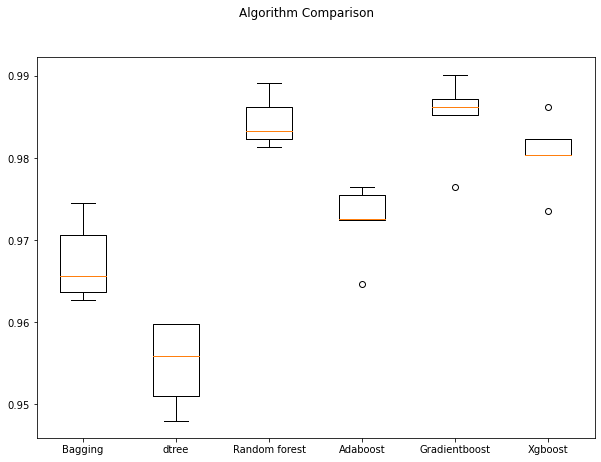

In [68]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Gradientboost is giving the highest cross-validated recall followed by Random Forest and XGBoost
- The boxplot shows that the performance of gradientboost is consistent with no outlier present.
- The Performance of Decision tree, Random forest and XGBoost are overfitting on trainig set.

In [69]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [70]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradientboost", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

over_results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Oversampled Data Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    over_cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    over_results.append(over_cv_result)
    names.append(name)
    print("{}: {}".format(name, over_cv_result.mean() * 100))

print("\n" "Oversampled Data Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Oversampled Data Cross-Validation Performance:

Bagging: 93.33210182993706
dtree: 92.3906559679809
Random forest: 95.92101060247457
Adaboost: 93.41055244472668
Gradientboost: 95.43069907059977
Xgboost: 97.11710827608768

Oversampled Data Training Performance:

Bagging: 99.37242596587566
dtree: 100.0
Random forest: 100.0
Adaboost: 93.97921161011963
Gradientboost: 96.31300254951951
Xgboost: 99.98038831143361


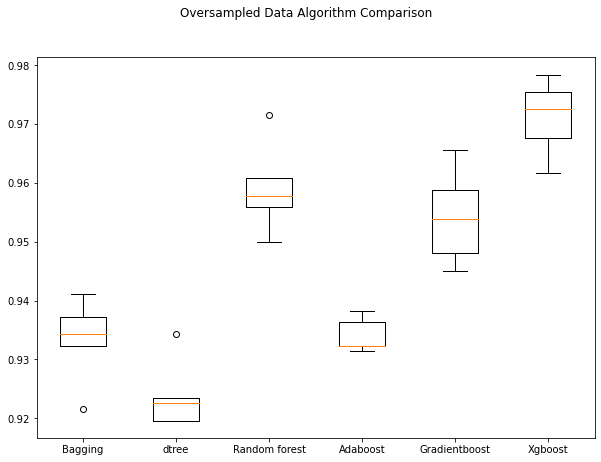

In [71]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Oversampled Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(over_results)
ax.set_xticklabels(names)

plt.show()

- Xgboost is giving the highest cross-validated recall followed by Random Forest and gradientboost
- The boxplot shows that the performance of gradientboost and XGBoost are consistent with no outlier present.
- The Performance of Decision tree and Random forest are overfitting on trainig set.

In [72]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [73]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradientboost", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

under_results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Undersampled Data Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    under_cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    under_results.append(under_cv_result)
    names.append(name)
    print("{}: {}".format(name, under_cv_result.mean() * 100))

print("\n" "Undersampled Data Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_train_under, model.predict(X_train_under)) * 100
    print("{}: {}".format(name, scores))


Undersampled Data Cross-Validation Performance:

Bagging: 89.34170591313449
dtree: 89.54788069073784
Random forest: 89.95918367346938
Adaboost: 88.62689691261122
Gradientboost: 91.70172684458399
Xgboost: 91.59811616954474

Undersampled Data Training Performance:

Bagging: 98.87295081967213
dtree: 100.0
Random forest: 100.0
Adaboost: 91.29098360655738
Gradientboost: 95.79918032786885
Xgboost: 100.0


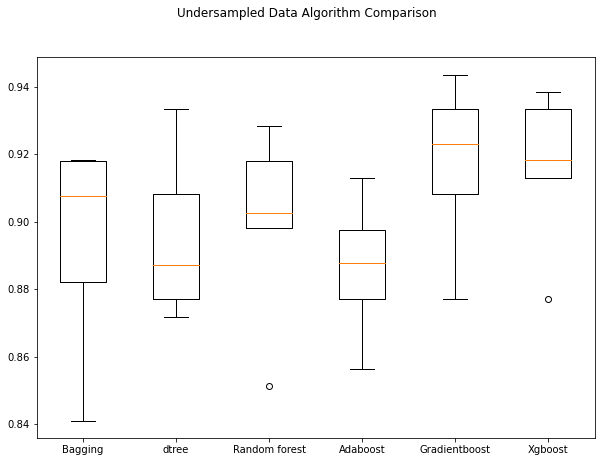

In [74]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Undersampled Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(under_results)
ax.set_xticklabels(names)

plt.show()

- Gradientboost is giving the highest cross-validated recall followed by Random Forest and XGboost
- The boxplot shows that the performance of gradientboost is consistent with no outlier present.
- The Performance of Decision tree, XGBoost and Random forest are overfitting on trainig set.

### Best 3 Models;

The Performance of;
* Decision tree, 
* Random forest,
* XGBoost are overfitting on training set. 

Which leaves us with 3 other models that are not overfitting the training set;
* Bagging
* Adaboost
* Gradientboost

We will tune these three models and treat them as our best models as they generalised on the training set.

In [75]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [76]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Hyperparameter Tuning Using Random Search

### Bagging

In [77]:
%%time

# defining model
bag_classifier = BaggingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {  
                'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bag_randomCV = RandomizedSearchCV(estimator=bag_classifier, param_distributions=param_grid, n_jobs = -1, 
                                   n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
bag_randomCV.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(bag_randomCV.best_params_, bag_randomCV.best_score_))

Best parameters are {'n_estimators': 40, 'max_samples': 0.7, 'max_features': 1} with CV score=1.0:
CPU times: user 2.03 s, sys: 606 ms, total: 2.64 s
Wall time: 56.2 s


In [78]:
# building model with best parameters
bag_tuned = BaggingClassifier(
    n_estimators=40,
    max_samples=0.7,
    max_features=1,
    random_state=1,
)

# Fit the model on training data
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=1, max_samples=0.7, n_estimators=40,
                  random_state=1)

In [79]:
# Calculating different metrics on train set
bag_train = model_performance_classification_sklearn(
    bag_tuned, X_train, y_train
)
print("Training performance:")
bag_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839342,1.0,0.839342,0.912654


In [80]:
# Calculating different metrics on validation set
bag_val = model_performance_classification_sklearn(
    bag_tuned, X_val, y_val
)
print("Validation performance:")
bag_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839092,1.0,0.839092,0.912507


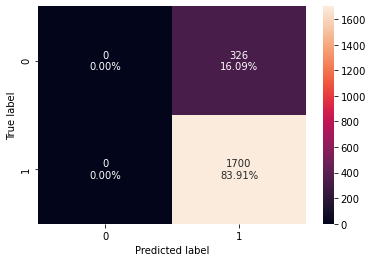

In [81]:
# creating confusion matrix
confusion_matrix_sklearn(bag_tuned, X_val, y_val)

- The validation recall is similar to the training recall value
- The recall value on the tuned bagging model is overfitting the training and the validation data
- We will tune the rest of the models

### AdaBoost

In [82]:
%%time

# defining model
ab_classifier = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ab_randomCV = RandomizedSearchCV(estimator=ab_classifier, param_distributions=param_grid, n_jobs = -1, 
                                   n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
ab_randomCV.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(ab_randomCV.best_params_, ab_randomCV.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
CPU times: user 2.24 s, sys: 479 ms, total: 2.72 s
Wall time: 1min 33s


In [83]:
# building model with best parameters
ab_tuned = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [84]:
# Calculating different metrics on train set
ab_train = model_performance_classification_sklearn(
    ab_tuned, X_train, y_train
)
print("Training performance:")
ab_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839342,1.0,0.839342,0.912654


In [85]:
# Calculating different metrics on validation set
ab_val = model_performance_classification_sklearn(
    ab_tuned, X_val, y_val
)
print("Validation performance:")
ab_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839092,1.0,0.839092,0.912507


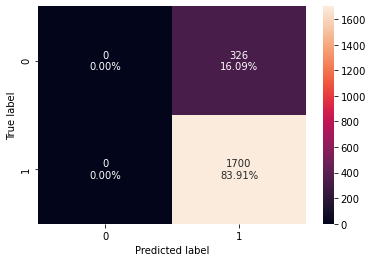

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(ab_tuned, X_val, y_val)

- The recall value on the tuned Adaboost model is also overfitting the training and the validation data
- The results from both bagging and adaboost are similar

### Gradientboost

In [87]:
%%time

# defining model
gb_classifier = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_randomCV = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_grid, n_jobs = -1, 
                                   n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gb_randomCV.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(gb_randomCV.best_params_, gb_randomCV.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 1} with CV score=0.9898016124997595:
CPU times: user 2.17 s, sys: 636 ms, total: 2.81 s
Wall time: 2min 52s


In [88]:
# building model with best parameters
gb_tuned = GradientBoostingClassifier(
    n_estimators=100,
    subsample=1,
    max_features=1,
    random_state=1,
)

# Fit the model on training data
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=1, subsample=1)

In [89]:
# Calculating different metrics on train set
gb_train = model_performance_classification_sklearn(
    gb_tuned, X_train, y_train
)
print("Training performance:")
gb_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.913086,0.990979,0.912918,0.950348


In [90]:
# Calculating different metrics on validation set
gb_val = model_performance_classification_sklearn(
    gb_tuned, X_val, y_val
)
print("Validation performance:")
gb_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.904245,0.991176,0.90397,0.945567


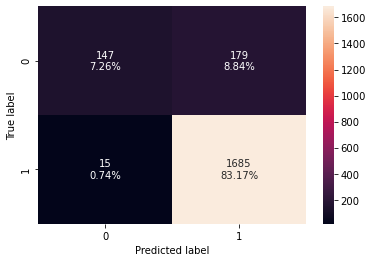

In [91]:
# creating confusion matrix
confusion_matrix_sklearn(gb_tuned, X_val, y_val)

- The recall value on the tuned Gradientboost model doesn't seem to be overfitting the training and the validation data
- The model is giving a generalized performance and can identify 83.17% of the account holders that won't get attrited.
- Confusion matrix also shows we have a reduced false negatives compared to the other models.

## Comparing all models

In [92]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bag_train.T,
        ab_train.T,
        gb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging",
    "AdaBoost",
    "GradientBoost",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging,AdaBoost,GradientBoost
Accuracy,0.839342,0.839342,0.913086
Recall,1.000000,1.000000,0.990979
Precision,0.839342,0.839342,0.912918
F1,0.912654,0.912654,0.950348


In [93]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        bag_val.T,
        ab_val.T,
        gb_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Bagging",
    "AdaBoost",
    "GradientBoost",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Bagging,AdaBoost,GradientBoost
Accuracy,0.839092,0.839092,0.904245
Recall,1.000000,1.000000,0.991176
Precision,0.839092,0.839092,0.903970
F1,0.912507,0.912507,0.945567


- Bagging and AdaBoost are giving a higher recall score but overfitting the training data.
- GradientBoost is giving a slightly less recall score and it's giving a more generalized performance as compared to the models, which makes it the best model here.
- Let's check the model's performance on test set and then see the feature importance from the gradient boost model

#### Performance on the test set

In [94]:
# Calculating different metrics on the test set
gb_test = model_performance_classification_sklearn(
    gb_tuned, X_test, y_test
)
print("Test performance:")
gb_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.903751,0.99177,0.903105,0.945363


- The performance on test data is generalised

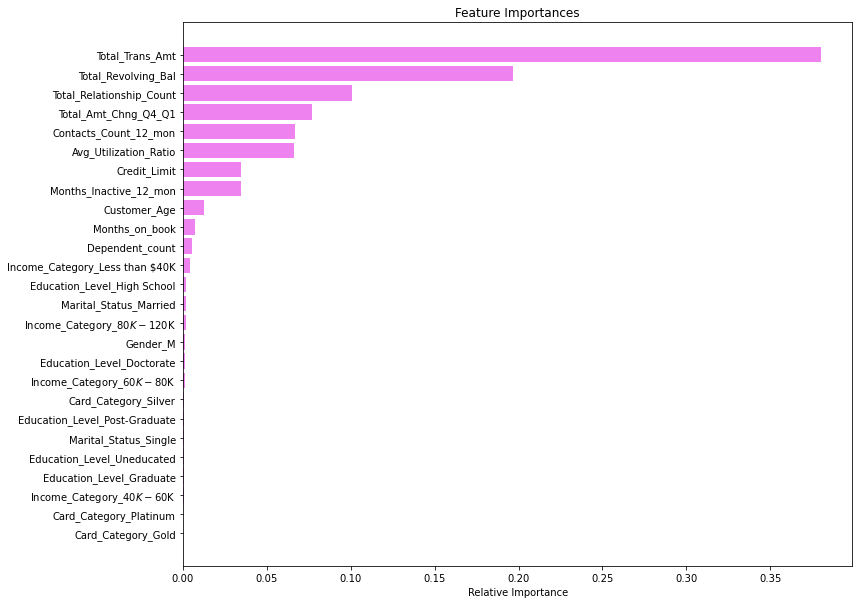

In [95]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Total transaction amount is the most important feature, followed by the total revolving balance and total no. of products held by the customer.

## Pipelines for productionizing the model
- Now, we have a final model. Let's use pipelines to put the model into production and utilize Column transformer to personalize the pipeline to perform different processing on different columns.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [96]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [
    "Gender", 
    "Education_Level", 
    "Marital_Status", 
    "Income_Category", 
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [97]:
# Separating target variable and other variables
X = df.drop(["Attrition_Flag"], axis=1)
Y = df["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

- Since we already know the best model we need to process with, we don't need to divide data into 3 parts

In [98]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


In [99]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GB",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=100,
                subsample=1,
                max_features=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                       

## Business Insights and Recommendations

- We have been able to build a model that will help the bank improve its services so that customers do not renounce their credit cards.
- Top 3 features that drive whether an account holder will renounce their credit cards are total transaction amount, total revolving balance and total number of products held by the customer.
- The best test recall is greater than 95% also, the test precision and accuracy are greater than 90%. This means that the final model is giving a generalized performance and is very good at identifying account holders that won't get attrited. 
- We saw in our analysis that account holders with blue and silver card are less likely to get attrited and platinum card holders are more likely to close their account. The bank can be less strict with their rules or interest rates for platinum card holders to manage the risk of losing them.
- Analysis showed that account holders with more than 50 total transaction count and more than 3000 total transaction amount are more likely to remain existing customers. The bank should improve their cashback reward program to entice customers to swipe their credit cards more while making purchases.
- Our analysis showed that customers who make more than 3 contacts with the bank within a 12 month period and holds less than 3 products are more likely to get attrited. The bank can improve their customer service and train there representative more on how to manage customer calls and how to market new products with better options to the customer.
- Customers with less than 2 inactive months during a 12 month period are less likely to close their account. The company should create easy mechanisms to gather feedback from customers who are inactive for than a month and use it to identify major concerns if any.
